In [1]:
import h5py
import matplotlib.pyplot as plt
import numpy as np
import os

from scipy.stats import iqr
from scipy.stats import wilcoxon
from uoineuro.classification_utils import plot_basal_ganglia_coefs

In [2]:
file_name = 'lr_bg.h5'

In [3]:
results_path = os.path.join(os.environ['HOME'],
                            'fits/uoineuro/classification',
                            file_name)

In [4]:
results = h5py.File(results_path, 'r')

In [5]:
baseline_gp = results['logistic_0.0_0.1_gp']
baseline_snr = results['logistic_0.0_0.1_snr']
uoi_gp = results['uoi_logistic_bic_0.0_0.1_gp']
uoi_snr = results['uoi_logistic_bic_0.0_0.1_snr']

In [6]:
baselines = [baseline_gp, baseline_snr]
uois = [uoi_gp, uoi_snr]

In [7]:
# coefficients
baseline_coefs = [baseline['coefs'][:] for baseline in baselines]
uoi_coefs = [uoi['coefs'][:] for uoi in uois]

In [8]:
# selection ratios
baseline_srs = [np.count_nonzero(baseline_coef, axis=1) / baseline_coef.shape[1]
                for baseline_coef in baseline_coefs]
uoi_srs = [np.count_nonzero(uoi_coef, axis=1) / uoi_coef.shape[1]
           for uoi_coef in uoi_coefs]

In [9]:
# scores
baseline_acc = [baseline['scores'][:] for baseline in baselines]
uoi_acc = [uoi['scores'][:] for uoi in uois]

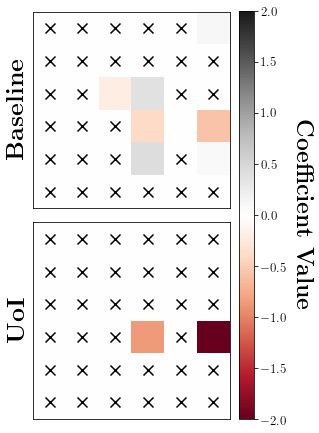

In [10]:
fig, axes = plt.subplots(2, 1, figsize=(5, 6))

_, _, baseline_img, uoi_img = plot_basal_ganglia_coefs(
    baseline_coefs[1],
    uoi_coefs[1],
    row_columns=(6, 6),
    scattersize=100,
    fax=(fig, axes),
    vmin=-2,
    vmax=2)

plt.tight_layout()

cax = fig.add_axes([0.8, 0.033, 0.04, 0.944])
cb = fig.colorbar(baseline_img, cax=cax, orientation='vertical')
cb.ax.tick_params(labelsize=13)
cb.set_label(r'\textbf{Coefficient Value}',
             labelpad=25,
             rotation=270,
             fontsize=23)
axes[0].set_ylabel(r'\textbf{Baseline}', fontsize=25)
axes[1].set_ylabel(r'\textbf{UoI}', fontsize=25)
plt.savefig('figure7_snr.pdf', bbox_inches='tight')

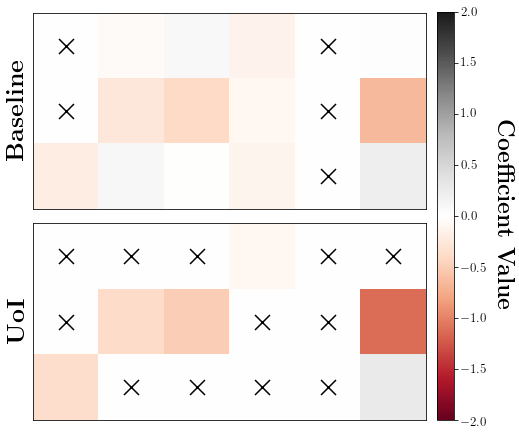

In [11]:
fig, axes = plt.subplots(2, 1, figsize=(12, 6))

_, _, baseline_img, uoi_img = plot_basal_ganglia_coefs(
    baseline_coefs[0],
    uoi_coefs[0],
    row_columns=(3, 6),
    fax=(fig, axes),
    vmin=-2,
    vmax=2
)

plt.tight_layout()

cax = fig.add_axes([0.74, 0.033, 0.02, 0.945])
cb = fig.colorbar(baseline_img, cax=cax, orientation='vertical')
cb.ax.tick_params(labelsize=13)
cb.set_label(r'\textbf{Coefficient Value}',
             labelpad=25,
             rotation=270,
             fontsize=23)

axes[0].set_ylabel(r'\textbf{Baseline}', fontsize=25)
axes[1].set_ylabel(r'\textbf{UoI}', fontsize=25)
plt.savefig('figure7_gp.pdf', bbox_inches='tight')

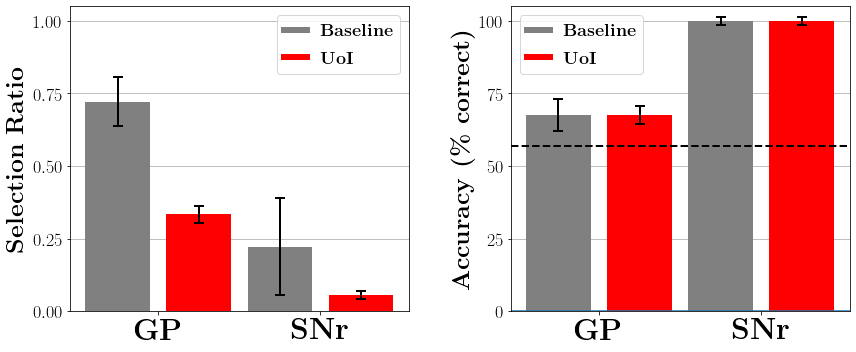

In [21]:
# plot the results
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# selection ratio plot
axes[0].bar(
    x=[0, 1, 2, 3],
    height=[np.median(baseline_srs[0]),
            np.median(uoi_srs[0]),
            np.median(baseline_srs[1]),
            np.median(uoi_srs[1])],
    width=0.8,
    color=['gray', 'red', 'gray', 'red'],
    yerr=[iqr(baseline_srs[0]) / 2.,
          iqr(uoi_srs[0]) / 2.,
          iqr(baseline_srs[1]) / 2.,
          iqr(uoi_srs[1]) / 2.],
    error_kw={'capsize': 5, 'elinewidth': 2, 'capthick': 2})

# accuracy plot
axes[1].bar(
    x=[0, 1, 2, 3],
    height=[np.median(baseline_acc[0]),
            np.median(uoi_acc[0]),
            np.median(baseline_acc[1]),
            np.median(uoi_acc[1])],
    width=0.8,
    color=['gray', 'red', 'gray', 'red'],
    yerr=[iqr(baseline_acc[0]) / 2.,
          iqr(uoi_acc[0]) / 2.,
          iqr(baseline_acc[1]) / 2.,
          iqr(uoi_acc[1]) / 2.],
    error_kw={'capsize': 5, 'elinewidth': 2, 'capthick': 2})

# chance
axes[1].axhline(y=106./186, xmin=0, xmax=1,
                linestyle='--',
                linewidth=2,
                color='black')

# plot labels
axes[0].set_ylabel(r'\textbf{Selection Ratio}', fontsize=25)
axes[1].set_ylabel(r'\textbf{Accuracy (\% correct)}', fontsize=25)

# cosmetic + legend
for ax in axes:
    # limits
    ax.set_ylim([0, 1.05])
    
    # ticks
    ax.set_xticks([0.5, 2.5])
    ax.set_xticklabels([r'\textbf{GP}', r'\textbf{SNr}'])
    ax.set_yticks([0, 0.25, 0.50, 0.75, 1.])
    ax.tick_params(axis='x', labelsize=30)
    ax.tick_params(axis='y', labelsize=18)

    
    # legend labels
    ax.plot([], color='gray', label=r'\textbf{Baseline}')
    ax.plot([], color='r', label=r'\textbf{UoI}')
    lgd = ax.legend(loc='best', prop={'size': 18},
                    handletextpad=0.7,
                    handlelength=1.3)
    for line in lgd.get_lines():
        line.set_linewidth(6.0)

    # gridlines
    ax.grid('on', axis='y')
    ax.set_axisbelow(True)
    
axes[1].set_yticklabels(['0', '25', '50', '75', '100'])

        
axes[1].axhline()

plt.tight_layout()
plt.subplots_adjust(wspace=0.3)
plt.savefig('figure7_bg_metrics.pdf', bbox_inches='tight')

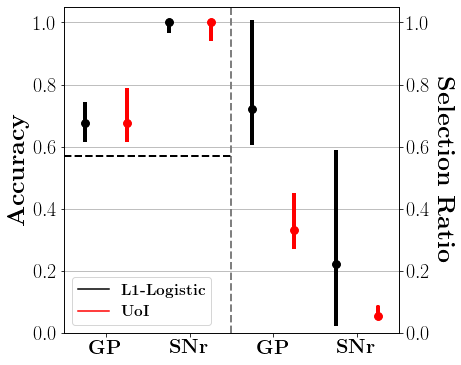

In [14]:
# alternative plot
fig, ax = plt.subplots(1, 1, figsize=(6, 6))

ax.boxplot(
    positions=[0, 2],
    x=baseline_acc,
    widths=0,
    boxprops={'linewidth': 4, 'color': 'k'},
    medianprops={'marker': '.', 'markersize': 15, 'color': 'k'},
    whiskerprops={'linewidth': 4, 'color': 'k'},
    showfliers=False)

ax.boxplot(
    positions=[1, 3],
    x=uoi_acc,
    widths=0,
    boxprops={'linewidth': 4, 'color': 'r'},
    medianprops={'marker': '.', 'markersize': 15, 'color': 'r'},
    whiskerprops={'linewidth': 4, 'color': 'r'},
    showfliers=False)

ax.boxplot(
    positions=[4, 6],
    x=baseline_srs,
    widths=0,
    boxprops={'linewidth': 4, 'color': 'k'},
    medianprops={'marker': '.', 'markersize': 15, 'color': 'k'},
    whiskerprops={'linewidth': 4, 'color': 'k'},
    showfliers=False)

ax.boxplot(
    positions=[5, 7],
    x=uoi_srs,
    widths=0,
    boxprops={'linewidth': 4, 'color': 'r'},
    medianprops={'marker': '.', 'markersize': 15, 'color': 'r'},
    whiskerprops={'linewidth': 4, 'color': 'r'},
    showfliers=False)

ax.grid('on', axis='y')
ax.axvline(
    x=3.5,
    linestyle='--',
    linewidth=2,
    color='gray')
ax.axhline(
    y=106./186, xmin=0, xmax=0.5,
    linestyle='--',
    linewidth=2,
    color='black')

ax.set_xticks([0.5, 2.5, 4.5, 6.5])
ax.set_xticklabels([r'\textbf{GP}', r'\textbf{SNr}', r'\textbf{GP}', r'\textbf{SNr}'])

ax2 = ax.twinx()

ax.set_ylim([0, 1.05])
ax2.set_ylim([0, 1.05])

ax.tick_params(labelsize=20)
ax2.tick_params(labelsize=20)

ax.set_ylabel(r'\textbf{Accuracy}', fontsize=25)
ax2.set_ylabel(r'\textbf{Selection Ratio}',
               fontsize=25,
               labelpad=25,
               rotation=270)

ax.plot([], [], color='k', label=r'\textbf{L1-Logistic}')
ax.plot([], [], color='r', label=r'\textbf{UoI}')
ax.legend(loc=3,
          prop={'size': 15.5})

#plt.savefig('basal_ganglia_metrics_summary.pdf', bbox_inches='tight')

In [15]:
# statistical tests

print('Selection Ratio, GP:', wilcoxon(x=baseline_srs[0], y=uoi_srs[0]))
print('Selection Ratio, SNr:', wilcoxon(x=baseline_srs[1], y=uoi_srs[1]))
print('Accuracy, GP:', wilcoxon(x=baseline_acc[0], y=uoi_acc[0]))
print('Accuracy, SNr:', wilcoxon(x=baseline_acc[1], y=uoi_acc[1]))

Selection Ratio, GP: WilcoxonResult(statistic=0.0, pvalue=0.043114446783075355)
Selection Ratio, SNr: WilcoxonResult(statistic=3.0, pvalue=0.2228009911811345)
Accuracy, GP: WilcoxonResult(statistic=5.0, pvalue=0.4922069926558157)
Accuracy, SNr: WilcoxonResult(statistic=1.5, pvalue=0.4142161782425252)


/home/psachdeva/anaconda3/envs/neuro/lib/python3.7/site-packages/scipy/stats/morestats.py:2863: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")
